# *Modelo predictivo de accidentes de trafico*
---
###  📌 *Objetivo del Proyecto*

*El objetivo de este proyecto es desarrollar un modelo de clasificación binaria capaz de predecir la severidad de las lesiones en accidentes de tráfico en función de variables relacionadas con las condiciones del entorno, características del siniestro y factores contextuales.*


## *Analisis exploratorio de datos*

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Proyecto ML trafico\\traffic-accidents\\versions\\1\\traffic_accidents.csv")

In [3]:
#split
train,test = train_test_split(df, test_size= 0.2, random_state = 42, shuffle = True)

#guardar
train.to_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Proyecto ML trafico\\traffic-accidents\\versions\\1\\traffic_accidents_train.csv",sep=';', decimal='.', index= False) 
test.to_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Proyecto ML trafico\\traffic-accidents\\versions\\1\\traffic_accidents_test.csv",sep=';',decimal= '.', index= False)

In [4]:
print(f'🔎 Dimensiones del dataset de test: {test.shape}')
print(f'🔎 Dimensiones del dataset de train: {train.shape}')

🔎 Dimensiones del dataset de test: (41862, 24)
🔎 Dimensiones del dataset de train: (167444, 24)


In [5]:
# Cargar train
df_train = pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Proyecto ML trafico\\traffic-accidents\\versions\\1\\traffic_accidents_train.csv", sep= ';', decimal= '.')
df_train.head().T

,0,1,2,3,4
crash_date,12/19/2017 06:40:00 AM,08/24/2024 03:00:00 PM,07/16/2018 08:56:00 AM,08/07/2021 04:30:00 PM,07/15/2019 09:01:00 PM
traffic_control_device,STOP SIGN/FLASHER,TRAFFIC SIGNAL,TRAFFIC SIGNAL,STOP SIGN/FLASHER,STOP SIGN/FLASHER
weather_condition,CLEAR,CLEAR,FOG/SMOKE/HAZE,CLEAR,CLEAR
lighting_condition,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT,DUSK
first_crash_type,TURNING,TURNING,TURNING,FIXED OBJECT,SIDESWIPE OPPOSITE DIRECTION
trafficway_type,DIVIDED - W/MEDIAN (NOT RAISED),FOUR WAY,NOT DIVIDED,FOUR WAY,FOUR WAY
alignment,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,CURVE ON GRADE,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL
roadway_surface_cond,DRY,DRY,DRY,DRY,DRY
road_defect,NO DEFECTS,NO DEFECTS,NO DEFECTS,NO DEFECTS,NO DEFECTS
crash_type,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167444 entries, 0 to 167443
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     167444 non-null  object 
 1   traffic_control_device         167444 non-null  object 
 2   weather_condition              167444 non-null  object 
 3   lighting_condition             167444 non-null  object 
 4   first_crash_type               167444 non-null  object 
 5   trafficway_type                167444 non-null  object 
 6   alignment                      167444 non-null  object 
 7   roadway_surface_cond           167444 non-null  object 
 8   road_defect                    167444 non-null  object 
 9   crash_type                     167444 non-null  object 
 10  intersection_related_i         167444 non-null  object 
 11  damage                         167444 non-null  object 
 12  prim_contributory_cause       

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,167444.0,2.063341,0.395460,1.0,2.0,2.0,2.0,10.0
injuries_total,167444.0,0.381214,0.798897,0.0,0.0,0.0,1.0,21.0
injuries_fatal,167444.0,0.001947,0.048592,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,167444.0,0.037875,0.233045,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,167444.0,0.220211,0.614796,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,167444.0,0.121181,0.450298,0.0,0.0,0.0,0.0,11.0
injuries_no_indication,167444.0,2.244344,1.244837,0.0,2.0,2.0,3.0,49.0
crash_hour,167444.0,13.367508,5.606680,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,167444.0,4.146007,1.967022,1.0,2.0,4.0,6.0,7.0
crash_month,167444.0,6.767785,3.429122,1.0,4.0,7.0,10.0,12.0


injuries_reported_not_evident
0.0     152554
1.0      11166
2.0       2640
3.0        713
4.0        242
5.0         79
6.0         26
7.0         13
8.0          6
9.0          3
11.0         1
10.0         1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


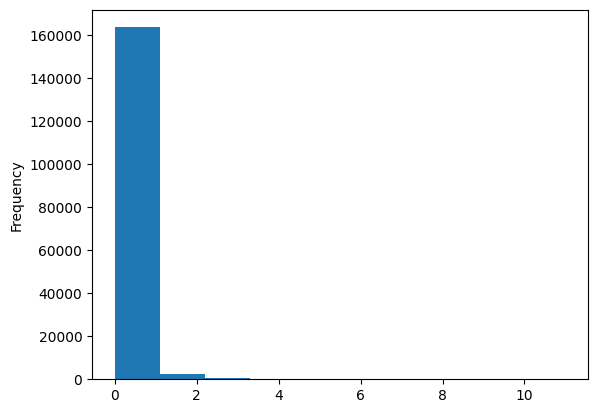

In [8]:
print(f"{df_train['injuries_reported_not_evident'].value_counts()}")
print(df_train['injuries_reported_not_evident'].plot(kind='hist'))

In [9]:
print(f"Filas duplicadas: {df_train.duplicated().sum()}")

Filas duplicadas: 20


In [10]:
df_train.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [11]:
#columnas tipo objeto
object_cols = df_train.select_dtypes(include='object').columns
print(f"\nTotal columnas tipo object: {len(object_cols)}")
print("📦 Columnas tipo objeto:")
print(object_cols)
#columnas tipo numerico
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"\nTotal columnas tipo numerico: {len(num_cols)}")
print("📦 Columnas tipo numerico:")
print(num_cols)


Total columnas tipo object: 14
📦 Columnas tipo objeto:
Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'most_severe_injury'],
      dtype='object')

Total columnas tipo numerico: 10
📦 Columnas tipo numerico:
Index(['num_units', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


Columnas numéricas: ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


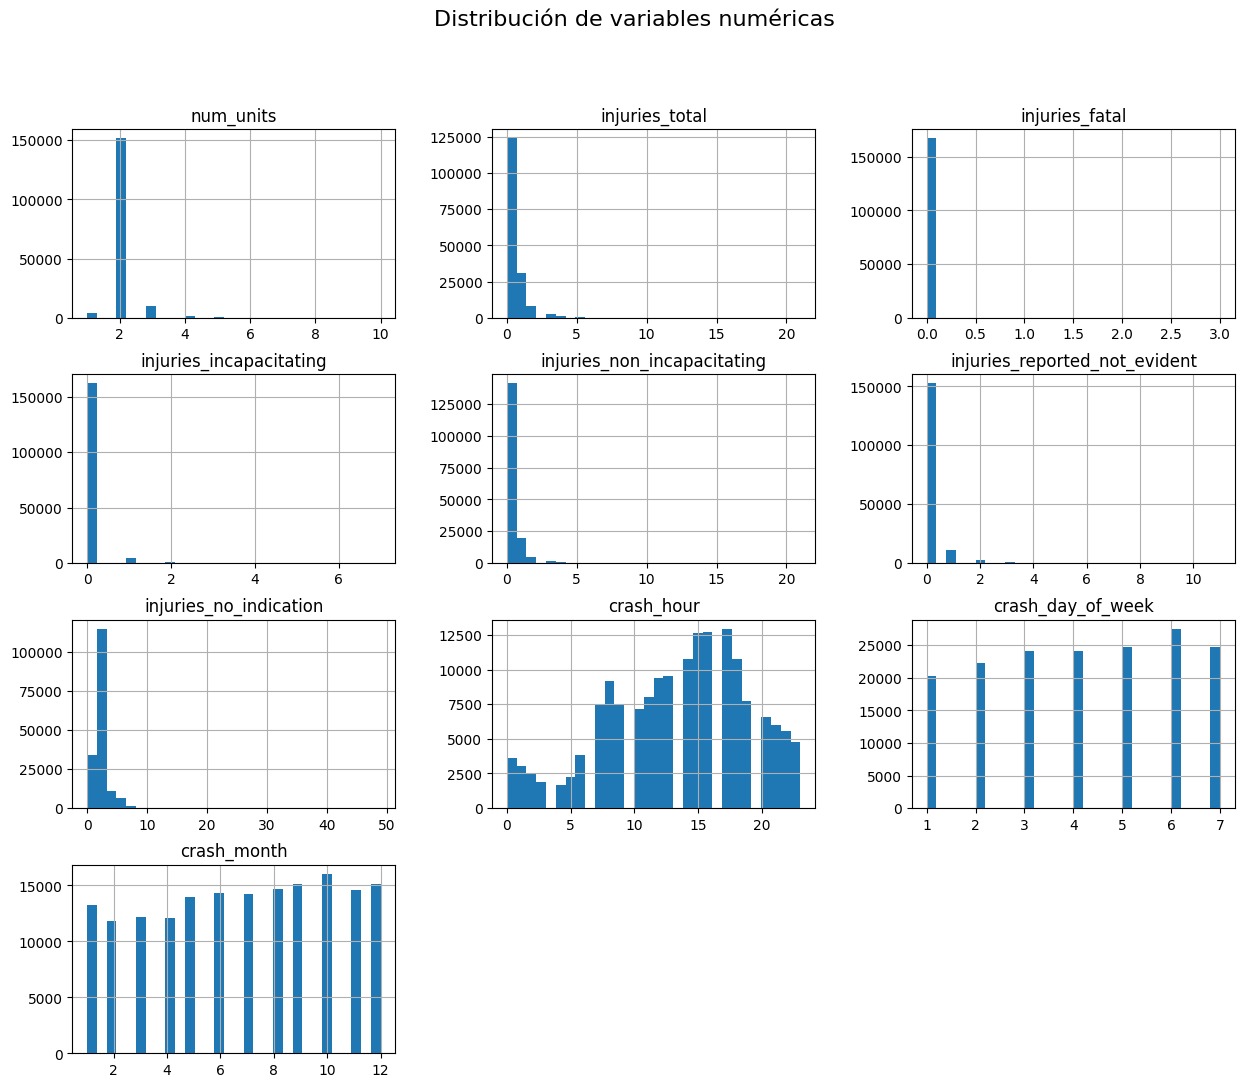

In [12]:
# Filtrar solo columnas numéricas
numeric_cols = df_train.select_dtypes(include=["int64", "float64"]).columns
print("Columnas numéricas:", numeric_cols.tolist())

# Histogramas de todas las variables numéricas
df_train[numeric_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

In [13]:
# exploracion de datos categoricos a profundidad
print(f"\n🔎 Causa principal del accidente: { df_train['prim_contributory_cause'].value_counts()}")


🔎 Causa principal del accidente: prim_contributory_cause
UNABLE TO DETERMINE                                                                 46634
FAILING TO YIELD RIGHT-OF-WAY                                                       34232
FOLLOWING TOO CLOSELY                                                               15231
DISREGARDING TRAFFIC SIGNALS                                                        11712
IMPROPER TURNING/NO SIGNAL                                                          10107
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8550
IMPROPER OVERTAKING/PASSING                                                          6681
DISREGARDING STOP SIGN                                                               5440
IMPROPER LANE USAGE                                                                  5178
NOT APPLICABLE                                                                       4230
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       

In [14]:
print(f"🔎 Tipo de accidente principal: {df['first_crash_type'].value_counts()}")
print(f"\n 🔎Tipo de accidente: 'Herido y no herido': {df_train['crash_type'].value_counts()}")

🔎 Tipo de accidente principal: first_crash_type
TURNING                         64157
ANGLE                           52250
REAR END                        42018
SIDESWIPE SAME DIRECTION        20116
PEDESTRIAN                       8996
PEDALCYCLIST                     5337
PARKED MOTOR VEHICLE             4893
FIXED OBJECT                     4742
SIDESWIPE OPPOSITE DIRECTION     1839
HEAD ON                          1790
REAR TO FRONT                    1157
REAR TO SIDE                      773
OTHER OBJECT                      759
OTHER NONCOLLISION                249
OVERTURNED                         96
ANIMAL                             77
REAR TO REAR                       49
TRAIN                               8
Name: count, dtype: int64

 🔎Tipo de accidente: 'Herido y no herido': crash_type
NO INJURY / DRIVE AWAY              94026
INJURY AND / OR TOW DUE TO CRASH    73418
Name: count, dtype: int64


In [15]:
print(f"\n🔎 Tipo de condicion climatica: {df['weather_condition'].value_counts()}")
print(f"\n🔎 Si el accidente ocurrió en intersección: {df['intersection_related_i'].value_counts()}")
print(f"\n🔎 Clasificacion de lesion: {df_train['most_severe_injury'].value_counts()}")
print(f"\n🔎 Costo del daño: {df_train['damage'].value_counts()}")
print(f"\n🔎 Condicion de iluminación: {df_train['lighting_condition'].value_counts()}")
print(f"\n🔎 Estado de la superficie: {df_train['roadway_surface_cond'].value_counts()}")
print(f"\n🔎 Defectos en la vía: {df_train['road_defect'].value_counts()}")
print(f"\n🔎 Tipo de vía: {df_train['trafficway_type'].value_counts()}")
print(f"\n🔎 Dispositivo de control de tráfico involucrado: {df_train['traffic_control_device'].value_counts()}")


🔎 Tipo de condicion climatica: weather_condition
CLEAR                       164700
RAIN                         21703
CLOUDY/OVERCAST               7533
SNOW                          6871
UNKNOWN                       6534
OTHER                          627
FREEZING RAIN/DRIZZLE          510
FOG/SMOKE/HAZE                 360
SLEET/HAIL                     308
BLOWING SNOW                   127
SEVERE CROSS WIND GATE          32
BLOWING SAND, SOIL, DIRT         1
Name: count, dtype: int64

🔎 Si el accidente ocurrió en intersección: intersection_related_i
Y    199324
N      9982
Name: count, dtype: int64

🔎 Clasificacion de lesion: most_severe_injury
NO INDICATION OF INJURY     123958
NONINCAPACITATING INJURY     25143
REPORTED, NOT EVIDENT        12822
INCAPACITATING INJURY         5226
FATAL                          295
Name: count, dtype: int64

🔎 Costo del daño: damage
OVER $1,500      117890
$501 - $1,500     32909
$500 OR LESS      16645
Name: count, dtype: int64

🔎 Condicion de

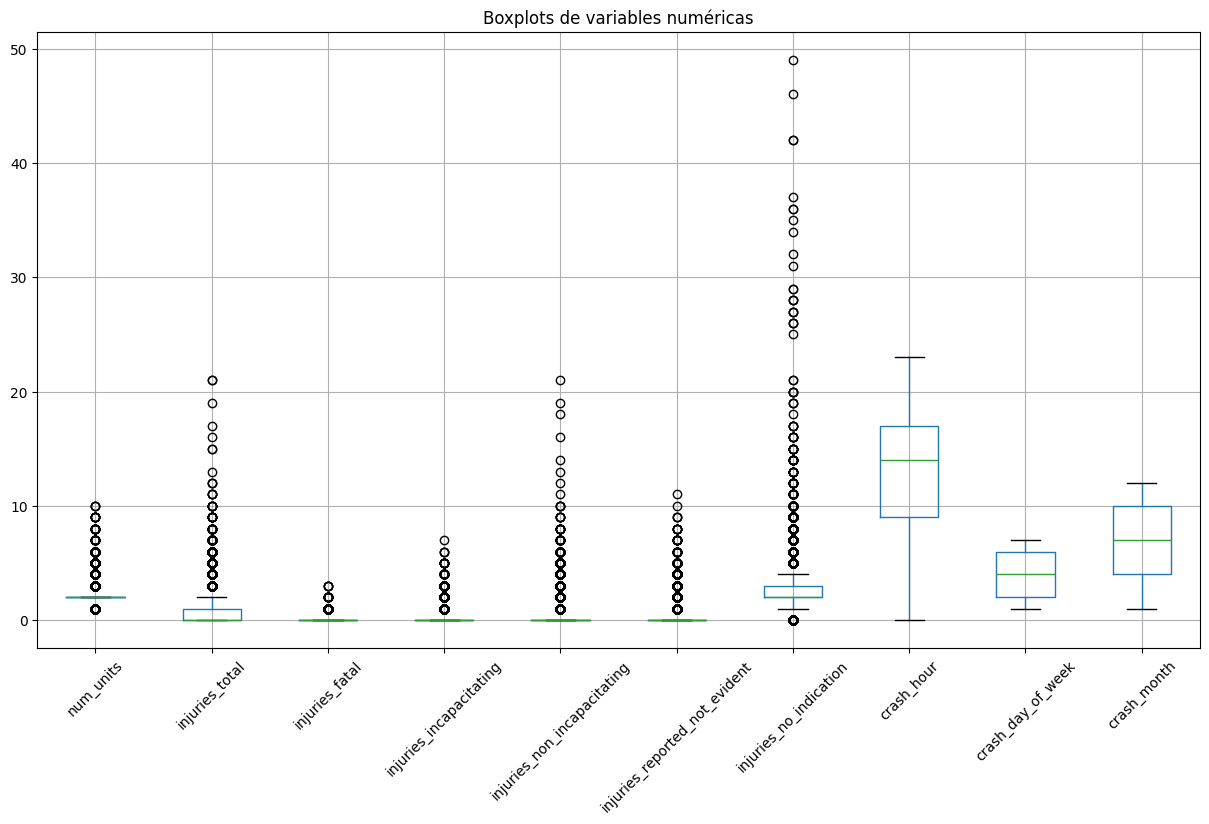

In [16]:
# Boxplots de todas las numéricas
plt.figure(figsize=(15, 8))
df_train[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()

## ⚙️ *Feature engeniering/ preprocesado*

- *Eliminar duplicados*
- *Agrupacion de categorias minimas*
- *Transformacion de variables ategoricas*
- *Generacion de variable objetivo*
---


In [17]:
# eliminar duplicados
df_train.drop_duplicates().T

,0,1,2,3,4,5,6,7,8,9,...,167434,167435,167436,167437,167438,167439,167440,167441,167442,167443
crash_date,12/19/2017 06:40:00 AM,08/24/2024 03:00:00 PM,07/16/2018 08:56:00 AM,08/07/2021 04:30:00 PM,07/15/2019 09:01:00 PM,03/04/2020 03:35:00 PM,02/18/2022 11:38:00 PM,04/18/2017 08:30:00 AM,11/02/2017 10:30:00 AM,12/10/2018 03:15:00 PM,...,05/14/2023 01:55:00 PM,04/20/2017 07:20:00 AM,03/24/2020 06:00:00 PM,01/06/2025 08:30:00 PM,05/29/2019 07:00:00 AM,08/12/2021 07:12:00 PM,10/05/2019 11:15:00 PM,03/25/2019 12:50:00 PM,07/09/2017 01:14:00 AM,08/18/2017 10:02:00 PM
traffic_control_device,STOP SIGN/FLASHER,TRAFFIC SIGNAL,TRAFFIC SIGNAL,STOP SIGN/FLASHER,STOP SIGN/FLASHER,STOP SIGN/FLASHER,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,...,NO CONTROLS,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,STOP SIGN/FLASHER,TRAFFIC SIGNAL,STOP SIGN/FLASHER,NO CONTROLS
weather_condition,CLEAR,CLEAR,FOG/SMOKE/HAZE,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR,CLOUDY/OVERCAST,CLEAR,...,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR,RAIN,CLEAR,CLEAR,CLEAR
lighting_condition,DAYLIGHT,DAYLIGHT,DAYLIGHT,DAYLIGHT,DUSK,DAYLIGHT,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT,DAYLIGHT,...,DAYLIGHT,DAYLIGHT,DAYLIGHT,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT,DARKNESS,DAYLIGHT,"DARKNESS, LIGHTED ROAD","DARKNESS, LIGHTED ROAD"
first_crash_type,TURNING,TURNING,TURNING,FIXED OBJECT,SIDESWIPE OPPOSITE DIRECTION,TURNING,HEAD ON,TURNING,REAR END,TURNING,...,TURNING,REAR END,SIDESWIPE SAME DIRECTION,REAR END,ANGLE,TURNING,PEDESTRIAN,ANGLE,TURNING,TURNING
trafficway_type,DIVIDED - W/MEDIAN (NOT RAISED),FOUR WAY,NOT DIVIDED,FOUR WAY,FOUR WAY,FOUR WAY,T-INTERSECTION,NOT DIVIDED,NOT DIVIDED,DIVIDED - W/MEDIAN (NOT RAISED),...,NOT DIVIDED,NOT DIVIDED,NOT DIVIDED,Y-INTERSECTION,FOUR WAY,NOT DIVIDED,FOUR WAY,DIVIDED - W/MEDIAN (NOT RAISED),NOT DIVIDED,DIVIDED - W/MEDIAN (NOT RAISED)
alignment,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,CURVE ON GRADE,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,...,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL
roadway_surface_cond,DRY,DRY,DRY,DRY,DRY,DRY,WET,DRY,DRY,DRY,...,DRY,DRY,DRY,DRY,WET,DRY,WET,DRY,UNKNOWN,DRY
road_defect,NO DEFECTS,NO DEFECTS,NO DEFECTS,NO DEFECTS,NO DEFECTS,UNKNOWN,UNKNOWN,NO DEFECTS,NO DEFECTS,NO DEFECTS,...,NO DEFECTS,NO DEFECTS,NO DEFECTS,UNKNOWN,NO DEFECTS,NO DEFECTS,NO DEFECTS,NO DEFECTS,UNKNOWN,NO DEFECTS
crash_type,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,...,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY


### *Agrupamiento de categorias bajas*

---

In [18]:
# Para prim_contributory_cause: categorías con menos de 400 registros 
counts_cause = df_train['prim_contributory_cause'].value_counts()

# pasar a lista
rare_causes = counts_cause[counts_cause < 400].index.tolist()

# Reemplazar categorías raras por 'OTHERS'
df_train['prim_contributory_cause'] = df_train['prim_contributory_cause'].replace(rare_causes, 'OTHERS')

# Verificación
print(df_train['prim_contributory_cause'].value_counts())

prim_contributory_cause
UNABLE TO DETERMINE                                                                 46634
FAILING TO YIELD RIGHT-OF-WAY                                                       34232
FOLLOWING TOO CLOSELY                                                               15231
DISREGARDING TRAFFIC SIGNALS                                                        11712
IMPROPER TURNING/NO SIGNAL                                                          10107
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8550
IMPROPER OVERTAKING/PASSING                                                          6681
DISREGARDING STOP SIGN                                                               5440
IMPROPER LANE USAGE                                                                  5178
NOT APPLICABLE                                                                       4230
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

In [19]:
# Para weather_condition: agrupar categorías raras específicas 
rare_weather = ['BLOWING SAND, SOIL, DIRT', 'SEVERE CROSS WIND GATE']
df_train['weather_condition'] = df_train['weather_condition'].replace(rare_weather, 'OTHER')

print(df_train['weather_condition'].value_counts())

weather_condition
CLEAR                    131833
RAIN                      17288
CLOUDY/OVERCAST            6015
SNOW                       5506
UNKNOWN                    5243
OTHER                       524
FREEZING RAIN/DRIZZLE       416
FOG/SMOKE/HAZE              274
SLEET/HAIL                  239
BLOWING SNOW                106
Name: count, dtype: int64


In [20]:
# Para traffic_control_device
counts_device = df_train['traffic_control_device'].value_counts()
rare_devices = counts_device[counts_device < 400].index.tolist()

df_train['traffic_control_device'] = df_train['traffic_control_device'].replace(rare_devices, 'OTHER')
print(df_train['traffic_control_device'].value_counts())

traffic_control_device
TRAFFIC SIGNAL       99291
STOP SIGN/FLASHER    39266
NO CONTROLS          23467
UNKNOWN               3599
OTHER                 1821
Name: count, dtype: int64


In [21]:
# Para first_crash_type
counts_crash = df_train['first_crash_type'].value_counts()
rare_crash = counts_crash[counts_crash < 2000].index.tolist()

df_train['first_crash_type'] = df_train['first_crash_type'].replace(rare_crash, 'OTHER')
print(df_train['first_crash_type'].value_counts())

first_crash_type
TURNING                     51264
ANGLE                       41832
REAR END                    33554
SIDESWIPE SAME DIRECTION    16137
PEDESTRIAN                   7252
OTHER                        5452
PEDALCYCLIST                 4249
PARKED MOTOR VEHICLE         3947
FIXED OBJECT                 3757
Name: count, dtype: int64


In [22]:
# para road_defect
counts_defect = df_train['road_defect'].value_counts()
rare_defect = counts_defect[counts_defect < 732].index.tolist()

df_train['road_defect'] = df_train['road_defect'].replace(rare_defect, 'OTHER')
print(df_train['road_defect'].value_counts())

road_defect
NO DEFECTS      137301
UNKNOWN          27634
OTHER             1722
WORN SURFACE       787
Name: count, dtype: int64


In [23]:
# para roadway_surface_cond
counts_defects = df_train['roadway_surface_cond'].value_counts()
rare_defects = counts_defects[counts_defects < 700].index.tolist()

df_train['roadway_surface_cond'] = df_train['roadway_surface_cond'].replace(rare_defects, 'OTHER')
print(df_train['roadway_surface_cond'].value_counts())

roadway_surface_cond
DRY              124729
WET               26297
UNKNOWN           10081
SNOW OR SLUSH      4908
ICE                1045
OTHER               384
Name: count, dtype: int64


### *Variable objetivo*

---

In [24]:
def assign_injury_severity_binary_train(row):
    # Grave si hay lesiones graves o moderadas
    if (row["injuries_fatal"] > 0 
        or row["injuries_incapacitating"] > 0 
        or row["injuries_non_incapacitating"] > 0
        or row["injuries_total"] > 2):
        return 1  # Grave
    # Leve si solo hay lesiones menores o ninguna
    elif (row["injuries_reported_not_evident"] > 0 
          or row["injuries_no_indication"] > 0
          or row["injuries_total"] == 0):
        return 0  # Leve
    else:
        return 0  # Default a leve si no entra en ninguna condición

# Crear columna target binaria
df_train["injury_severity"] = df_train.apply(assign_injury_severity_binary_train, axis=1)

# Ver distribución de clases
print("Distribución de injury_severity en TRAIN (leve=0, grave=1):")
print(df_train["injury_severity"].value_counts(normalize=True))

Distribución de injury_severity en TRAIN (leve=0, grave=1):
injury_severity
0    0.811298
1    0.188702
Name: proportion, dtype: float64


*Esto convierte el problema en una clasificación binaria (0/1) donde:*

 - 0 = Leve
 - 1 = Grave


⚠️ ***Desbalanceo de clases***


### *Codificacion*
1. *Variables categoricas:*
 - ***Target Encoding***: *captura la relación directa de las categorías con la gravedad.*
 - ***One-hot Encoding***: *variables nominales con pocas categorías importantes.*
 - ***Label Encoding***: *binaria*.
 - ***Ordinal Encoding***: *variables con jerarquía natural*

2. *Variables de tiempo*



---



In [25]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
import category_encoders as ce 
from category_encoders import TargetEncoder

In [26]:
# Columnas según tipo de codificación
target_cols = ['prim_contributory_cause', 'trafficway_type', 'traffic_control_device', 'first_crash_type']
onehot_cols = ['road_defect', 'weather_condition']
label_cols = ['crash_type', 'intersection_related_i']
ordinal_mappings = {
    'roadway_surface_cond': ['DRY', 'WET', 'SNOW OR SLUSH', 'ICE', 'WORN SURFACE', 'OTHER', 'UNKNOWN'],
    'lighting_condition': ['DAYLIGHT', 'DAWN', 'DUSK', 'DARKNESS, LIGHTED ROAD', 'DARKNESS', 'UNKNOWN']
}

# -------------------------------
# 1️⃣ Target Encoding
target_encoders = {}
for col in target_cols:
    te = TargetEncoder()
    df_train[col] = te.fit_transform(df_train[col], df_train['injury_severity'])
    target_encoders[col] = te

# -------------------------------
# 2️⃣ One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(df_train[onehot_cols])

onehot_train = pd.DataFrame(ohe.transform(df_train[onehot_cols]),
                            columns=ohe.get_feature_names_out(onehot_cols),
                            index=df_train.index)
df_train = pd.concat([df_train.drop(columns=onehot_cols), onehot_train], axis=1)

# -------------------------------
# 3️⃣ Ordinal Encoding
ordinal_encoders = {}
for col, categories in ordinal_mappings.items():
    oe = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
    df_train[[col]] = oe.fit_transform(df_train[[col]])
    ordinal_encoders[col] = oe

# -------------------------------
# 4️⃣ Label Encoding
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    label_encoders[col] = le

In [27]:
# Convertir a datetime
df_train['crash_date'] = pd.to_datetime(df_train['crash_date'])


# 1️⃣ Crash hour (codificación cíclica)
# ----------------------------
df_train['crash_hour'] = df_train['crash_date'].dt.hour

# Codificación cíclica
df_train['crash_hour_sin'] = np.sin(2 * np.pi * df_train['crash_hour'] / 24)
df_train['crash_hour_cos'] = np.cos(2 * np.pi * df_train['crash_hour'] / 24)

# 2️⃣ Crash day of week (One-Hot Encoding)
# ----------------------------
df_train['crash_day_of_week'] = df_train['crash_date'].dt.dayofweek + 1  # lunes=1, domingo=7

# One-Hot Encoding
day_cols = [f'day_{i}' for i in range(1, 8)]
df_train[day_cols] = pd.get_dummies(df_train['crash_day_of_week'], prefix='day', drop_first=False)

# ✅ Verificar
print("Train shape:", df_train.shape)

Train shape: (167444, 44)


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167444 entries, 0 to 167443
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   crash_date                               167444 non-null  datetime64[ns]
 1   traffic_control_device                   167444 non-null  float64       
 2   lighting_condition                       167444 non-null  float64       
 3   first_crash_type                         167444 non-null  float64       
 4   trafficway_type                          167444 non-null  float64       
 5   alignment                                167444 non-null  object        
 6   roadway_surface_cond                     167444 non-null  float64       
 7   crash_type                               167444 non-null  int64         
 8   intersection_related_i                   167444 non-null  int64         
 9   damage                    

### *Correlacion (⚠️ se mostrará correlacion alta con variables pertenecientes al target)*

C:\Users\oridi\AppData\Local\Temp\ipykernel_38316\46642419.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


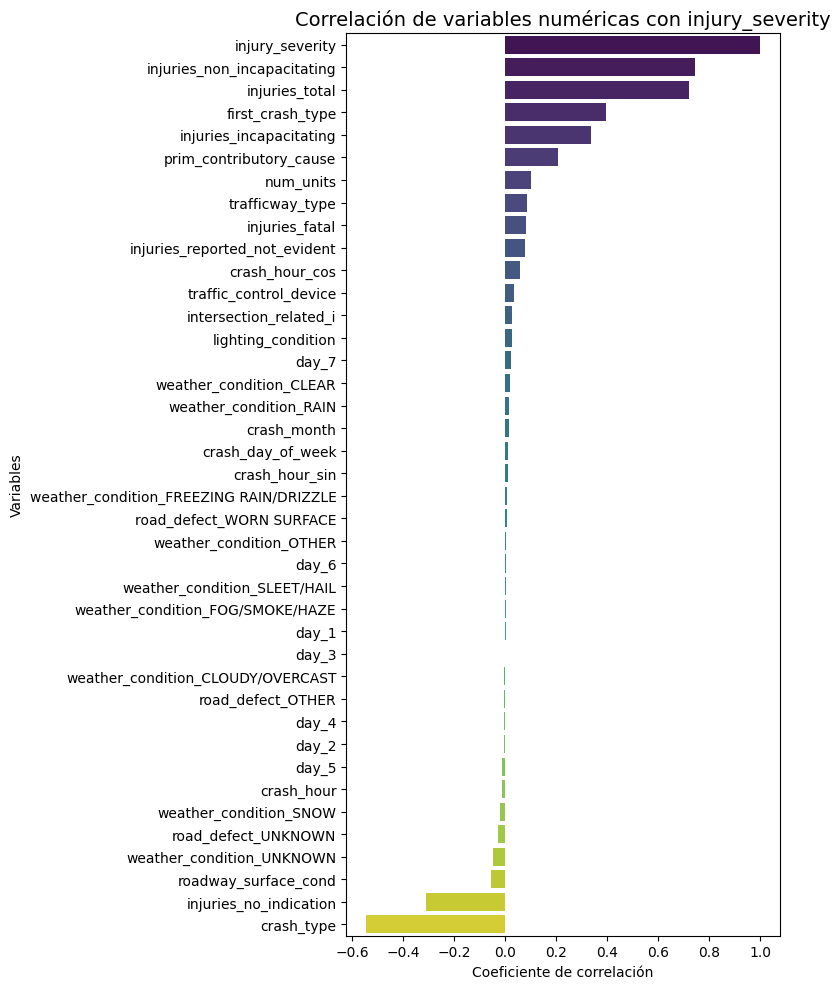

In [29]:
corr = df_train.corr(numeric_only=True)

# extraemos solo la correlación con la target
target_corr = corr['injury_severity'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,10))
sns.barplot(
    x=target_corr.values, 
    y=target_corr.index, 
    palette="viridis"
)

plt.title("Correlación de variables numéricas con injury_severity", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


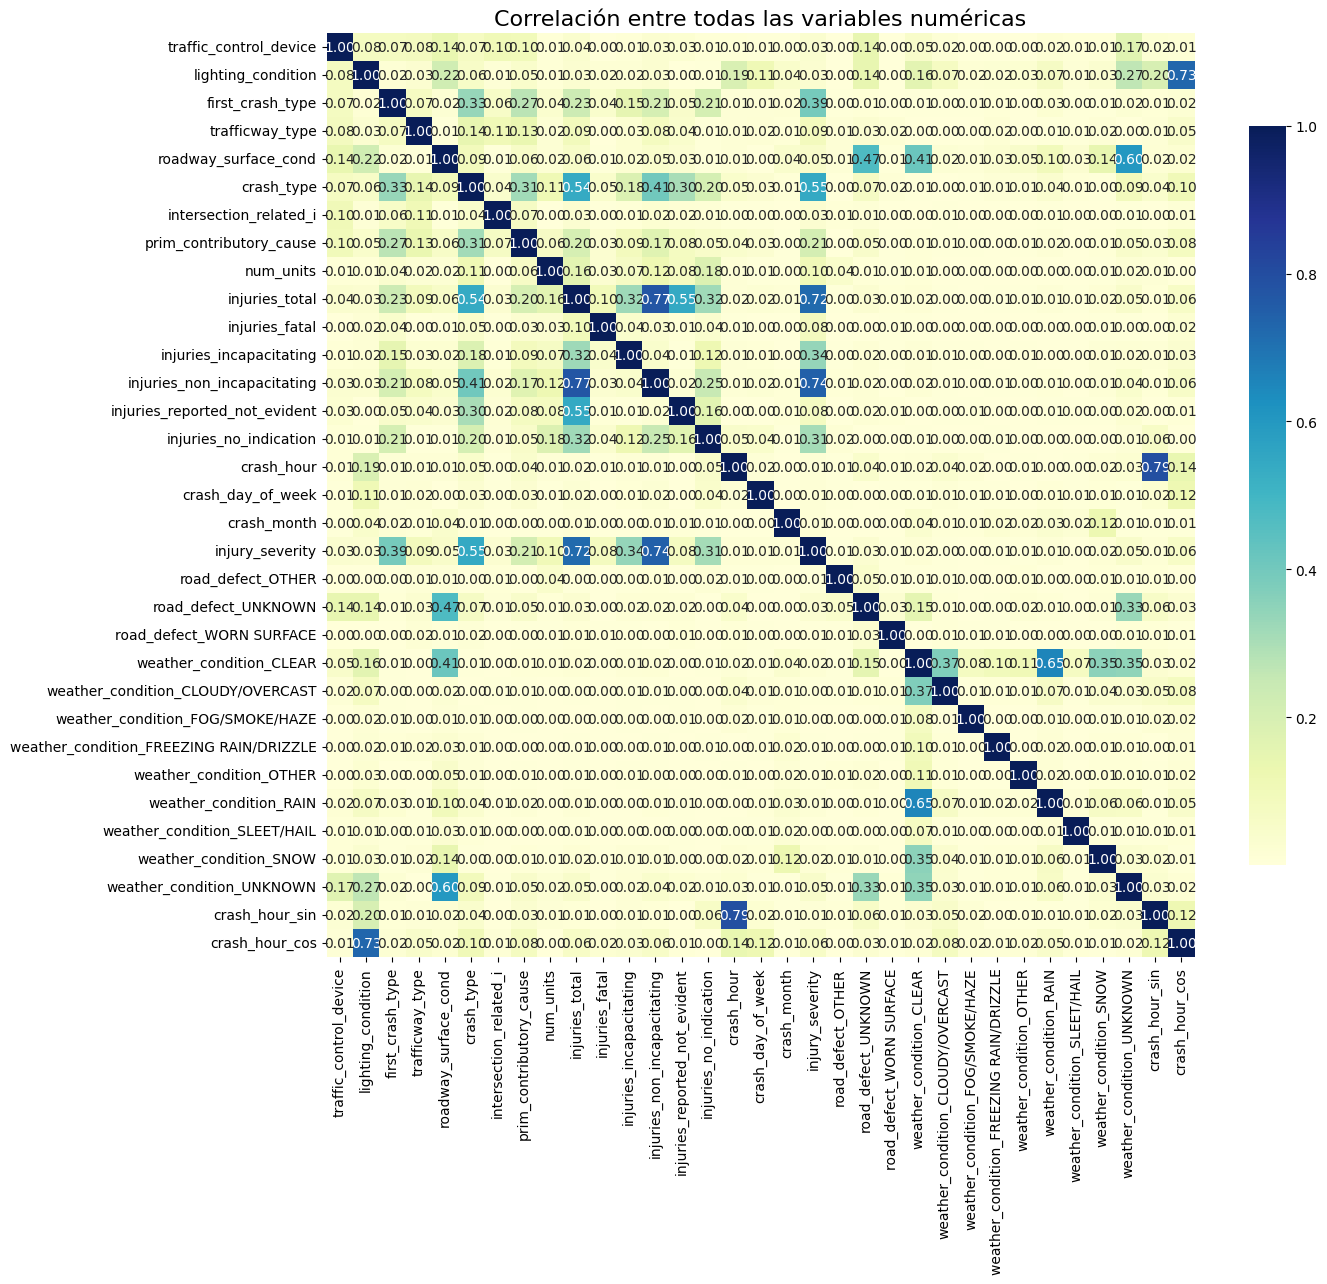

In [30]:
# correlacion (⚠️ se mostrará correlacion alta con variables pertenecientes al target)
# Todas las columnas numéricas automáticamente
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Correlación absoluta de todas las columnas numéricas
corr = df_train[num_cols].corr().abs()

# Heatmap de correlaciones
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"shrink": 0.8})
plt.title("Correlación entre todas las variables numéricas", fontsize=16)
plt.show()


## *Entrenamiento y validacion*

- *Seleccion de modelos*
-  *Entrenamiento*
-  *Evaluacion*


---

### 1. *Moelado de Test*

In [31]:
#cargar test
df_test= pd.read_csv("C:\\Users\\oridi\\Desktop\\Programacion\\Proyecto ML trafico\\traffic-accidents\\versions\\1\\traffic_accidents_test.csv",sep=';',decimal= '.')

In [32]:
# Target en TEST
def assign_injury_severity_binary_test(row):
    if (row["injuries_fatal"] > 0 
        or row["injuries_incapacitating"] > 0 
        or row["injuries_non_incapacitating"] > 0
        or row["injuries_total"] > 2):
        return 1  # Grave
    elif (row["injuries_reported_not_evident"] > 0 
          or row["injuries_no_indication"] > 0
          or row["injuries_total"] == 0):
        return 0  # Leve
    else:
        return 0

df_test["injury_severity"] = df_test.apply(assign_injury_severity_binary_test, axis=1)

print("Distribución de injury_severity en TEST (leve=0, grave=1):")
print(df_test["injury_severity"].value_counts(normalize=True))


Distribución de injury_severity en TEST (leve=0, grave=1):
injury_severity
0    0.808705
1    0.191295
Name: proportion, dtype: float64


In [33]:
# Gestionar variable de fecha
df_test['crash_date'] = pd.to_datetime(df_test['crash_date'])


# 1️⃣ Crash hour (codificación cíclica)
df_test['crash_hour'] = df_test['crash_date'].dt.hour
# Codificación cíclica
df_test['crash_hour_sin'] = np.sin(2 * np.pi * df_test['crash_hour'] / 24)
df_test['crash_hour_cos'] = np.cos(2 * np.pi * df_test['crash_hour'] / 24)

# ----------------------------
# 2️⃣ Crash day of week (One-Hot Encoding)

df_test['crash_day_of_week'] = df_test['crash_date'].dt.dayofweek + 1  # lunes=1, domingo=7
# One-Hot Encoding
day_cols = [f'day_{i}' for i in range(1, 8)]
df_test[day_cols] = pd.get_dummies(df_test['crash_day_of_week'], prefix='day', drop_first=False)

C:\Users\oridi\AppData\Local\Temp\ipykernel_38316\4089706554.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['crash_date'] = pd.to_datetime(df_test['crash_date'])


In [34]:
# drop columns
cols_to_drop =['damage','injuries_fatal','injuries_incapacitating','injuries_non_incapacitating','crash_date','most_severe_injury',
               'injuries_reported_not_evident','injuries_no_indication', 'injuries_total','alignment','crash_date','most_severe_injury'
               ]

df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

# eliminar duplicados
df_test.drop_duplicates()

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,crash_type,intersection_related_i,prim_contributory_cause,...,injury_severity,crash_hour_sin,crash_hour_cos,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,...,0,-0.707107,-0.707107,False,False,False,False,True,False,False
1,TRAFFIC SIGNAL,CLOUDY/OVERCAST,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,...,0,0.258819,-0.965926,False,False,False,True,False,False,False
2,TRAFFIC SIGNAL,CLOUDY/OVERCAST,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,Y,FAILING TO YIELD RIGHT-OF-WAY,...,1,0.500000,-0.866025,False,False,False,True,False,False,False
3,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,ALLEY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,...,0,-0.707107,-0.707107,False,False,False,False,False,True,False
4,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,Y-INTERSECTION,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,FAILING TO REDUCE SPEED TO AVOID CRASH,...,1,-0.258819,-0.965926,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41856,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,IMPROPER TURNING/NO SIGNAL,...,0,-0.500000,0.866025,False,False,True,False,False,False,False
41857,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT REPORTED,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,UNABLE TO DETERMINE,...,1,-0.258819,0.965926,False,False,False,False,False,False,True
41858,TRAFFIC SIGNAL,CLEAR,DUSK,SIDESWIPE SAME DIRECTION,FOUR WAY,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,...,0,-0.965926,-0.258819,False,False,False,False,False,True,False
41859,TRAFFIC SIGNAL,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,...,0,-0.258819,0.965926,False,False,False,False,False,False,True


In [35]:
# Agrupamiento de categorias bajas 

# Para prim_contributory_cause
counts_cause = df_test['prim_contributory_cause'].value_counts()
rare_causes = counts_cause[counts_cause < 400].index.tolist()
df_test['prim_contributory_cause'] = df_test['prim_contributory_cause'].replace(rare_causes, 'OTHERS')

# Para weather_condition
rare_weather = ['BLOWING SAND, SOIL, DIRT', 'SEVERE CROSS WIND GATE']
df_test['weather_condition'] = df_test['weather_condition'].replace(rare_weather, 'OTHER')

# Para traffic_control_device
counts_device = df_test['traffic_control_device'].value_counts()
rare_devices = counts_device[counts_device < 400].index.tolist()
df_test['traffic_control_device'] = df_test['traffic_control_device'].replace(rare_devices, 'OTHER')

# Para first_crash_type
counts_crash = df_test['first_crash_type'].value_counts()
rare_crash = counts_crash[counts_crash < 2000].index.tolist()
df_test['first_crash_type'] = df_test['first_crash_type'].replace(rare_crash, 'OTHER')

# para road_defect
counts_defect = df_test['road_defect'].value_counts()
rare_defect = counts_defect[counts_defect < 732].index.tolist()
df_test['road_defect'] = df_test['road_defect'].replace(rare_defect, 'OTHER')

# para roadway_surface_cond
counts_defects = df_test['roadway_surface_cond'].value_counts()
rare_defects = counts_defects[counts_defects < 700].index.tolist()
df_test['roadway_surface_cond'] = df_test['roadway_surface_cond'].replace(rare_defects, 'OTHER')

⚠️ *No usar Target Encoding en la muestra de test directamente; aplicar la media calculada en el train.*

In [36]:
# 1️⃣ Target Encoding (usar mapping guardado)
for col, te in target_encoders.items():
    df_test[col] = te.transform(df_test[col])

# 2️⃣ One-Hot Encoding
onehot_test = pd.DataFrame(
    ohe.transform(df_test[onehot_cols]),
    columns=ohe.get_feature_names_out(onehot_cols),
    index=df_test.index
)
df_test = pd.concat([df_test.drop(columns=onehot_cols), onehot_test], axis=1)

# 3️⃣ Ordinal Encoding
for col, oe in ordinal_encoders.items():
    df_test[col] = oe.transform(df_test[[col]])

# 4️⃣ Label Encoding
for col, le in label_encoders.items():
    df_test[col] = df_test[col].astype(str).map(lambda x: x if x in le.classes_ else 'UNKNOWN')
    # Asegurarse de que 'UNKNOWN' está en el encoder
    if 'UNKNOWN' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'UNKNOWN')
    df_test[col] = le.transform(df_test[col])

In [37]:
print("✅ Dimensiones Finales de Test:", df_test.shape)
print("✅ Dimensiones Finales de Train:", df_train.shape)

✅ Dimensiones Finales de Test: (41862, 34)
✅ Dimensiones Finales de Train: (167444, 34)


### 2. *Definicion de modelos y entrenamiento*

---

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score,ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, accuracy_score, f1_score, make_scorer
)


# Separar features y target
# ==========================
target_col = "injury_severity"

X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col]

# ==========================
# Alinear columnas (importante!)

# Si alguna columna falta en test → añadirla
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Si hay columnas extra en test → eliminarlas
for col in X_test.columns:
    if col not in X_train.columns:
        X_test = X_test.drop(columns=[col])

# Reordenar columnas en el mismo orden
X_test = X_test[X_train.columns]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (167444, 33)
y_train: (167444,)
X_test: (41862, 33)
y_test: (41862,)


### *Logistic Regression*

In [39]:
# Logistic Regression con class_weight
# ==========================
pipe_bal = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000))
])

pipe_bal.fit(X_train, y_train)

y_pred_bal = pipe_bal.predict(X_test)
y_proba_bal = pipe_bal.predict_proba(X_test)[:, 1]

print("==== Logistic Regression con class_weight='balanced' ====")
print(classification_report(y_test, y_pred_bal, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))


# Logistic Regression con SMOTE
# ==========================
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

pipe_smote = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=42, max_iter=1000))
])

pipe_smote.fit(X_train_sm, y_train_sm)

y_pred_smote = pipe_smote.predict(X_test)
y_proba_smote = pipe_smote.predict_proba(X_test)[:, 1]

print("\n==== Logistic Regression con SMOTE (0.5) ====")
print(classification_report(y_test, y_pred_smote, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_smote))

==== Logistic Regression con class_weight='balanced' ====
              precision    recall  f1-score   support

           0     0.9999    0.6899    0.8165     33854
           1     0.4326    0.9998    0.6039      8008

    accuracy                         0.7492     41862
   macro avg     0.7163    0.8448    0.7102     41862
weighted avg     0.8914    0.7492    0.7758     41862

ROC-AUC: 0.8640488823812803

==== Logistic Regression con SMOTE (0.5) ====
              precision    recall  f1-score   support

           0     0.9465    0.7706    0.8495     33854
           1     0.4569    0.8158    0.5857      8008

    accuracy                         0.7792     41862
   macro avg     0.7017    0.7932    0.7176     41862
weighted avg     0.8528    0.7792    0.7991     41862

ROC-AUC: 0.8616731012238189


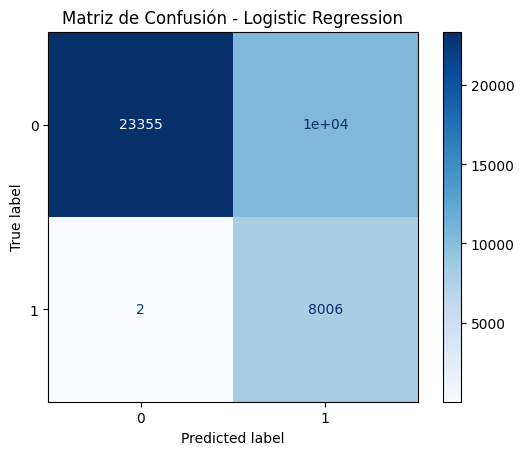

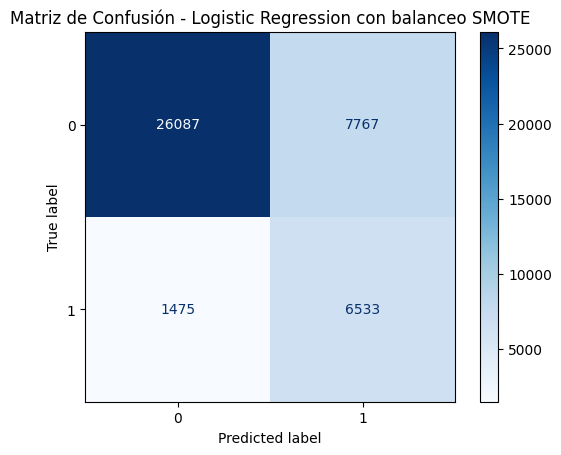

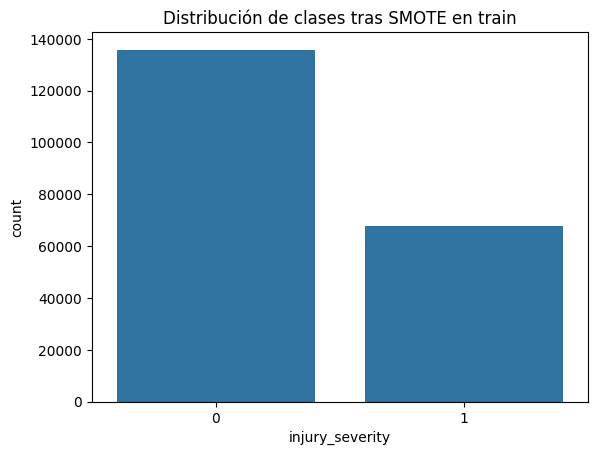

In [40]:
# Matriz de confusión
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal, cmap='Blues')
disp.ax_.set_title("Matriz de Confusión - Logistic Regression")
plt.show()
# ==========================
# Matriz de confusión con SMOTE
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, cmap='Blues')
disp.ax_.set_title("Matriz de Confusión - Logistic Regression con balanceo SMOTE")
plt.show()
# ==========================
# Visualizar balance de clases después de SMOTE

sns.countplot(x=y_train_sm)
plt.title("Distribución de clases tras SMOTE en train")
plt.show()

In [41]:
print("✅ Después SMOTE:")
print("X_train_smote:", X_train_sm.shape)
print("y_train_smote:", y_train_sm.shape)

✅ Después SMOTE:
X_train_smote: (203770, 33)
y_train_smote: (203770,)


### *Arboles de decision*


===== Modelo: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8286    0.9637    0.8911     33854
           1     0.5064    0.1575    0.2402      8008

    accuracy                         0.8095     41862
   macro avg     0.6675    0.5606    0.5657     41862
weighted avg     0.7670    0.8095    0.7666     41862



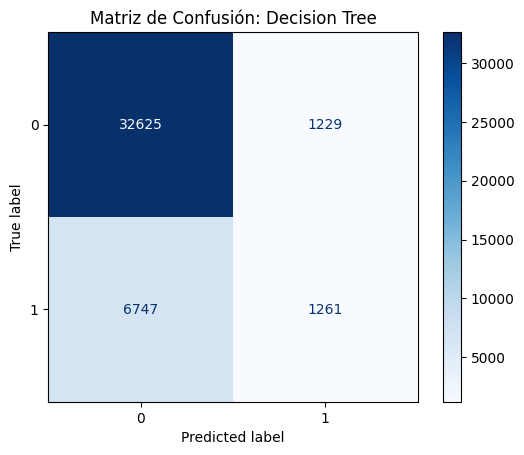


===== Modelo: Random Forest =====
              precision    recall  f1-score   support

           0     0.8518    0.9238    0.8863     33854
           1     0.4986    0.3203    0.3901      8008

    accuracy                         0.8084     41862
   macro avg     0.6752    0.6221    0.6382     41862
weighted avg     0.7842    0.8084    0.7914     41862



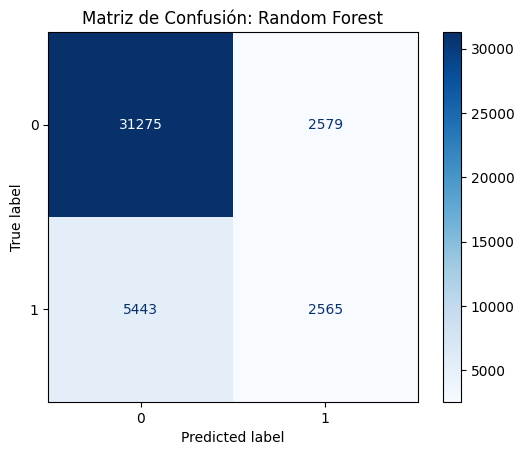


===== Modelo: Gradient Boosting =====
              precision    recall  f1-score   support

           0     0.8371    0.9652    0.8966     33854
           1     0.5835    0.2060    0.3045      8008

    accuracy                         0.8200     41862
   macro avg     0.7103    0.5856    0.6006     41862
weighted avg     0.7886    0.8200    0.7833     41862



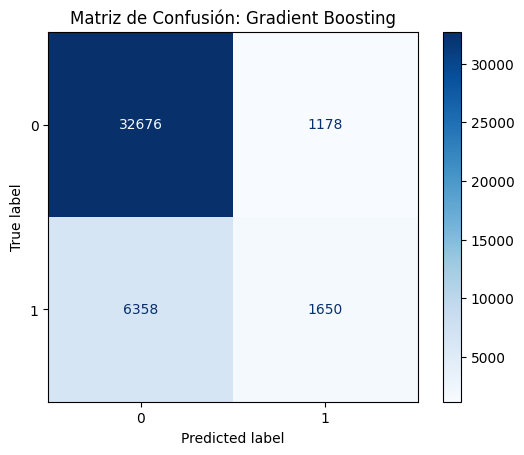


===== Modelo: XGBoost =====


c:\Users\oridi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0     0.8413    0.9574    0.8956     33854
           1     0.5675    0.2363    0.3336      8008

    accuracy                         0.8195     41862
   macro avg     0.7044    0.5968    0.6146     41862
weighted avg     0.7889    0.8195    0.7881     41862



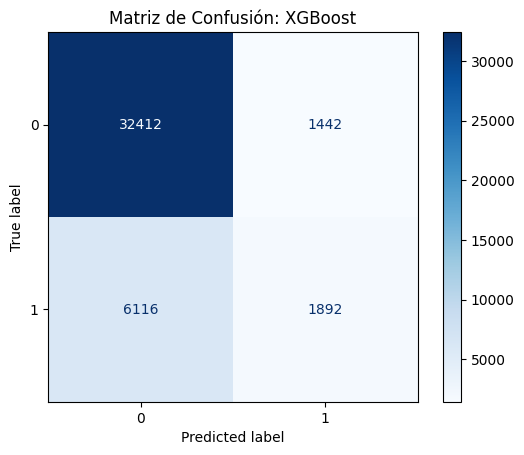

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


# Definir modelos
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05,
                                 subsample=0.8, colsample_bytree=0.8,
                                 use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# -------------------------------
# Entrenamiento, predicción y evaluación
results = []
model_results = {}   #  Aquí guardaremos las predicciones
trained_models = {}  # Opcional: guardar los modelos entrenados

for name, model in models.items():
    print(f"\n===== Modelo: {name} =====")
    
    # Entrenar con datos balanceados de SMOTE
    model.fit(X_train_sm, y_train_sm)
    
    # Predecir en test
    y_pred = model.predict(X_test)
    
      # Guardar predicciones y modelo entrenado
    model_results[name] = y_pred
    trained_models[name] = model
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1_weighted': f1})
    
    # Reporte detallado
    print(classification_report(y_test, y_pred, digits=4))
    
    # Matriz de confusión
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    disp.ax_.set_title(f"Matriz de Confusión: {name}")
    plt.show()


In [43]:
results_df = pd.DataFrame(results)
print("\nResumen de resultados:")
print(results_df)


Resumen de resultados:
               Model  Accuracy  F1_weighted
0      Decision Tree  0.809469     0.766574
1      Random Forest  0.808370     0.791394
2  Gradient Boosting  0.819980     0.783349
3            XGBoost  0.819454     0.788083


C:\Users\oridi\AppData\Local\Temp\ipykernel_38316\2989236066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1_weighted', data=results_df, palette='viridis')


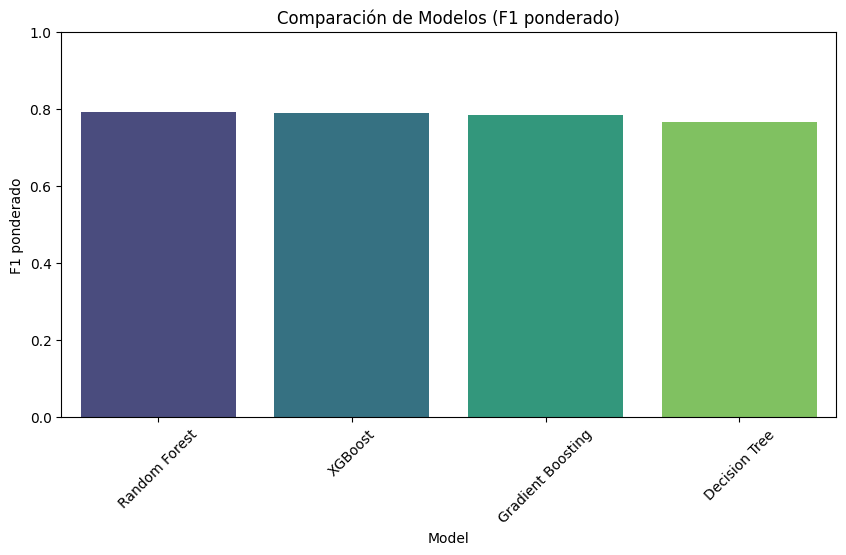

In [44]:
# Comparación de modelos
results_df = pd.DataFrame(results).sort_values(by='F1_weighted', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='F1_weighted', data=results_df, palette='viridis')
plt.title("Comparación de Modelos (F1 ponderado)")
plt.ylabel("F1 ponderado")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

### *Prueba con Algoritmos para clases desbalanceadas*
---


===== Balanced RF =====

Train Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.6921    0.8181    135847
           1     0.4303    0.9999    0.6017     31597

    accuracy                         0.7502    167444
   macro avg     0.7152    0.8460    0.7099    167444
weighted avg     0.8925    0.7502    0.7772    167444


Test Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.6897    0.8163     33854
           1     0.4325    0.9999    0.6038      8008

    accuracy                         0.7490     41862
   macro avg     0.7162    0.8448    0.7101     41862
weighted avg     0.8914    0.7490    0.7757     41862


Train Metrics: {'accuracy': 0.7502149972528129, 'f1': 0.6017235633004809, 'roc_auc': np.float64(0.9005921640510712), 'avg_precision': np.float64(0.6519492706854036)}
Test Metrics: {'accuracy': 0.7490325354736993, 'f1': 0.6038461538461538, 'roc_auc': np.float64(

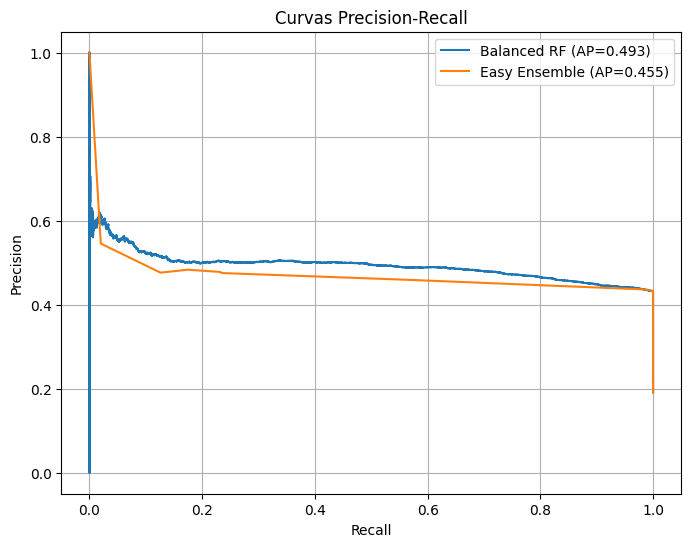


=== Resumen de Resultados ===
           model  split  accuracy        f1   roc_auc  avg_precision
0    Balanced RF  train  0.750215  0.601724  0.900592       0.651949
1    Balanced RF   test  0.749033  0.603846  0.868861       0.492590
2  Easy Ensemble  train  0.750215  0.601724  0.891950       0.604437
3  Easy Ensemble   test  0.749033  0.603846  0.856134       0.455302


In [45]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# 1. Definir modelos ajustados
# ==============================
brf = BalancedRandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    class_weight="balanced",
    bootstrap=True,
    random_state=None, 
    n_jobs=-1
)

eec = EasyEnsembleClassifier(
    n_estimators=50,    # Más submodelos para estabilidad
    sampling_strategy=1.0,  # Asegura balance completo de clases
    random_state=None,  
    n_jobs=-1
)

models = {
    "Balanced RF": brf,
    "Easy Ensemble": eec
}

# 2. Función de evaluación 
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n===== {name} =====")
    results = {}

    # --- Training ---
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:,1]

    train_metrics = {
        "accuracy": accuracy_score(y_train, y_train_pred),
        "f1": f1_score(y_train, y_train_pred),
        "roc_auc": roc_auc_score(y_train, y_train_proba),
        "avg_precision": average_precision_score(y_train, y_train_proba)
    }

    # --- Testing ---
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:,1]

    test_metrics = {
        "accuracy": accuracy_score(y_test, y_test_pred),
        "f1": f1_score(y_test, y_test_pred),
        "roc_auc": roc_auc_score(y_test, y_test_proba),
        "avg_precision": average_precision_score(y_test, y_test_proba)
    }

    results["train"] = train_metrics
    results["test"] = test_metrics

    # --- Reporte detallado ---
    print("\nTrain Classification Report:")
    print(classification_report(y_train, y_train_pred, digits=4))
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred, digits=4))

    print("\nTrain Metrics:", train_metrics)
    print("Test Metrics:", test_metrics)

    # --- Curva Precision-Recall ---
    precisions, recalls, _ = precision_recall_curve(y_test, y_test_proba)
    plt.plot(recalls, precisions, label=f"{name} (AP={test_metrics['avg_precision']:.3f})")

    return results

# 3. Entrenar y evaluar todos los modelos
# ==============================
all_results = {}
plt.figure(figsize=(8,6))
for name, model in models.items():
    results = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    all_results[name] = results

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision-Recall")
plt.legend()
plt.grid(True)
plt.show()

# 4. Convertir a DataFrame resumen
# ==============================
rows = []
for model_name, res in all_results.items():
    for split in ["train", "test"]:
        row = {"model": model_name, "split": split}
        row.update(res[split])
        rows.append(row)

df_results = pd.DataFrame(rows)
print("\n=== Resumen de Resultados ===")
print(df_results)


### *Visualizacion global*
---

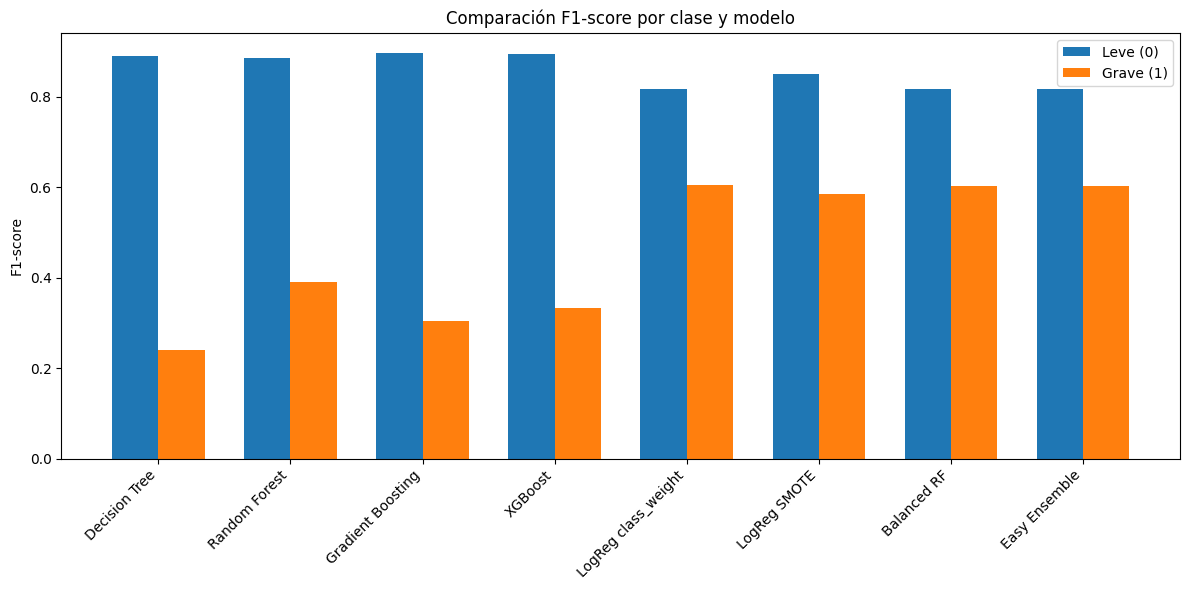

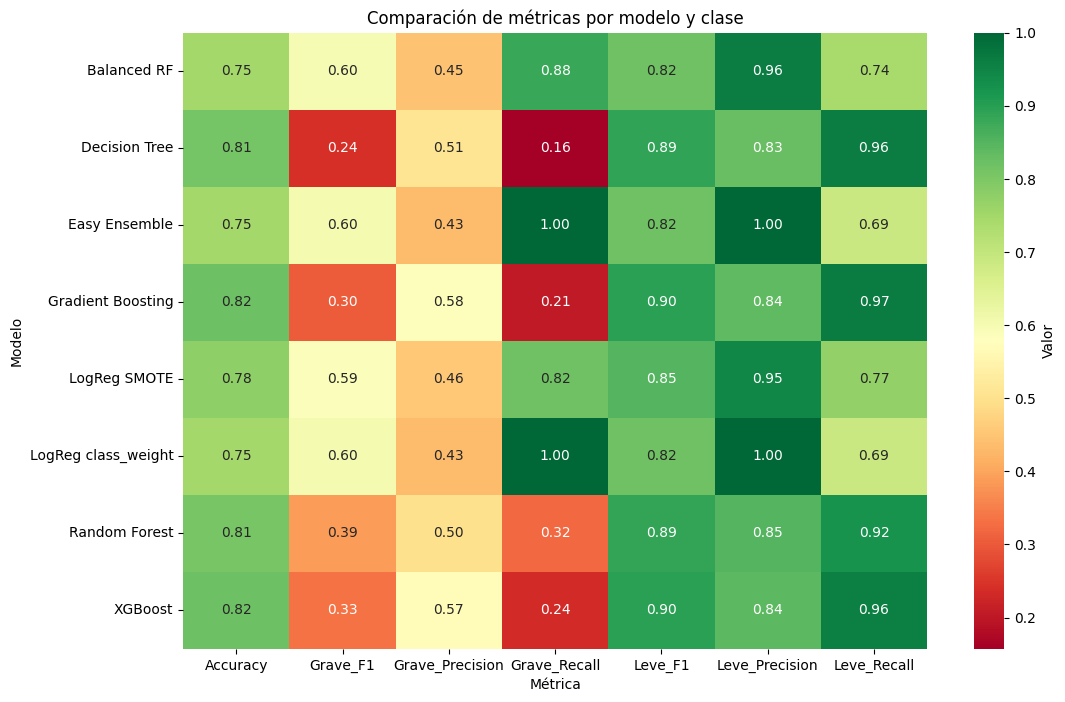

In [46]:
# Datos resumidos de métricas por modelo

metrics = {
    'Modelo': [
        'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost',
        'LogReg class_weight', 'LogReg SMOTE', 'Balanced RF', 'Easy Ensemble'
    ],
    'Leve_F1': [0.8911, 0.8863, 0.8966, 0.8956, 0.8165, 0.8495, 0.8181, 0.8163],
    'Grave_F1': [0.2402, 0.3901, 0.3045, 0.3336, 0.6039, 0.5857, 0.6017, 0.6038],
    'Leve_Recall': [0.9637, 0.9238, 0.9652, 0.9574, 0.6899, 0.7706, 0.7417, 0.6897],
    'Grave_Recall': [0.1575, 0.3203, 0.2060, 0.2363, 0.9998, 0.8158, 0.8795, 0.9999],
    'Leve_Precision': [0.8286, 0.8518, 0.8371, 0.8413, 0.9999, 0.9465, 0.9630, 1.0000],
    'Grave_Precision': [0.5064, 0.4986, 0.5835, 0.5675, 0.4326, 0.4569, 0.4461, 0.4325],
    'Accuracy': [0.8095, 0.8084, 0.8200, 0.8195, 0.7492, 0.7792, 0.7490, 0.7490],
}

df_metrics = pd.DataFrame(metrics)


# 1️⃣ Gráfico de barras: F1-score Leve vs Grave
# ================================
plt.figure(figsize=(12,6))
bar_width = 0.35
index = range(len(df_metrics))

plt.bar(index, df_metrics['Leve_F1'], bar_width, label='Leve (0)')
plt.bar([i + bar_width for i in index], df_metrics['Grave_F1'], bar_width, label='Grave (1)')

plt.xticks([i + bar_width/2 for i in index], df_metrics['Modelo'], rotation=45, ha='right')
plt.ylabel('F1-score')
plt.title('Comparación F1-score por clase y modelo')
plt.legend()
plt.tight_layout()
plt.show()


# 2️⃣ Heatmap de Precision, Recall y F1 por clase
# ================================
# Transformar a formato largo
df_heatmap = df_metrics.melt(id_vars='Modelo', 
                             value_vars=['Accuracy','Leve_Precision','Leve_Recall','Leve_F1',
                                         'Grave_Precision','Grave_Recall','Grave_F1'],
                             var_name='Métrica', value_name='Valor')

# Pivot para heatmap
df_pivot = df_heatmap.pivot(index='Modelo', columns='Métrica', values='Valor')

plt.figure(figsize=(12,8))
sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap='RdYlGn', cbar_kws={'label': 'Valor'})
plt.title("Comparación de métricas por modelo y clase")
plt.show()


### ✅  *Significado del heatmap*:
 - *Verde: valores altos → buen rendimiento.*
 - *Rojo: valores bajos → áreas a mejorar (principalmente clase minoritaria “Grave”).*
 - *Las columnas de Recall Grave y F1 Grave muestran los puntos débiles de todos los modelos.*
 - *Permite comparar rápidamente cómo cada modelo maneja la clase mayoritaria y la minoritaria, así como la métrica global.*

In [ ]:
safe_model_names = [name.replace(' ', '_') for name in model_results.keys()]



📊 Histogramas de crash_day_of_week por modelo


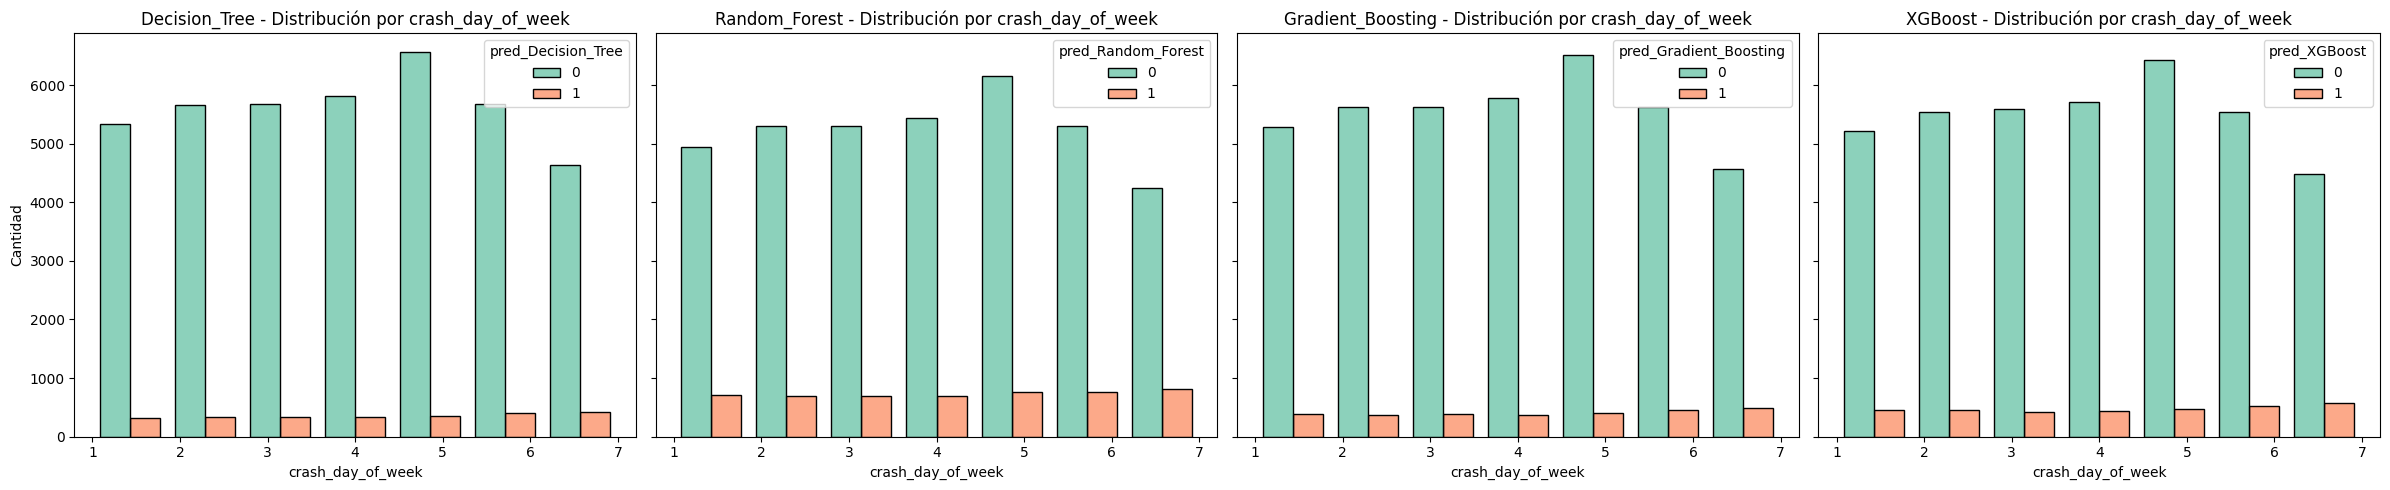


📊 Histogramas de crash_hour por modelo


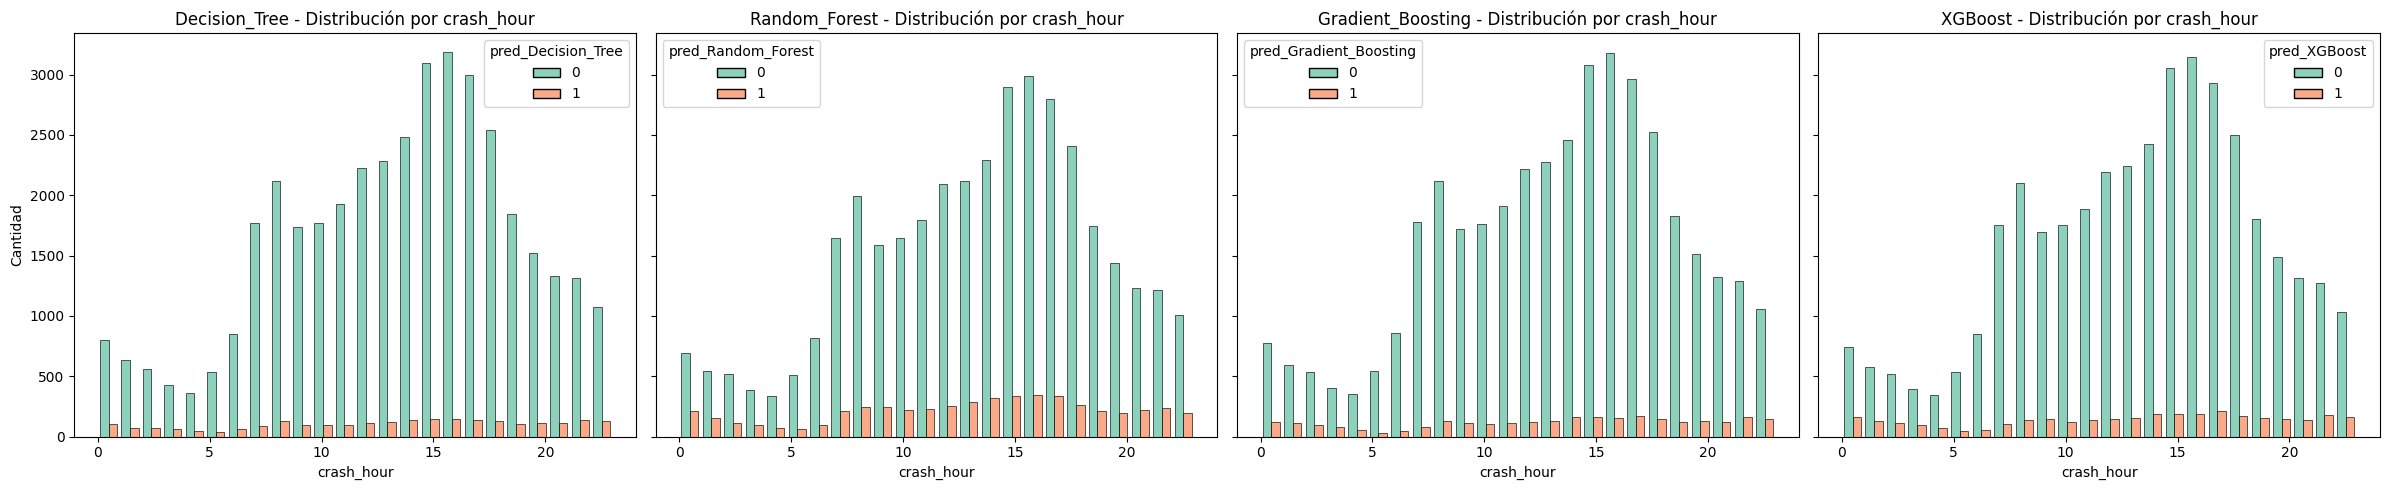


📊 Histogramas de roadway_surface_cond por modelo


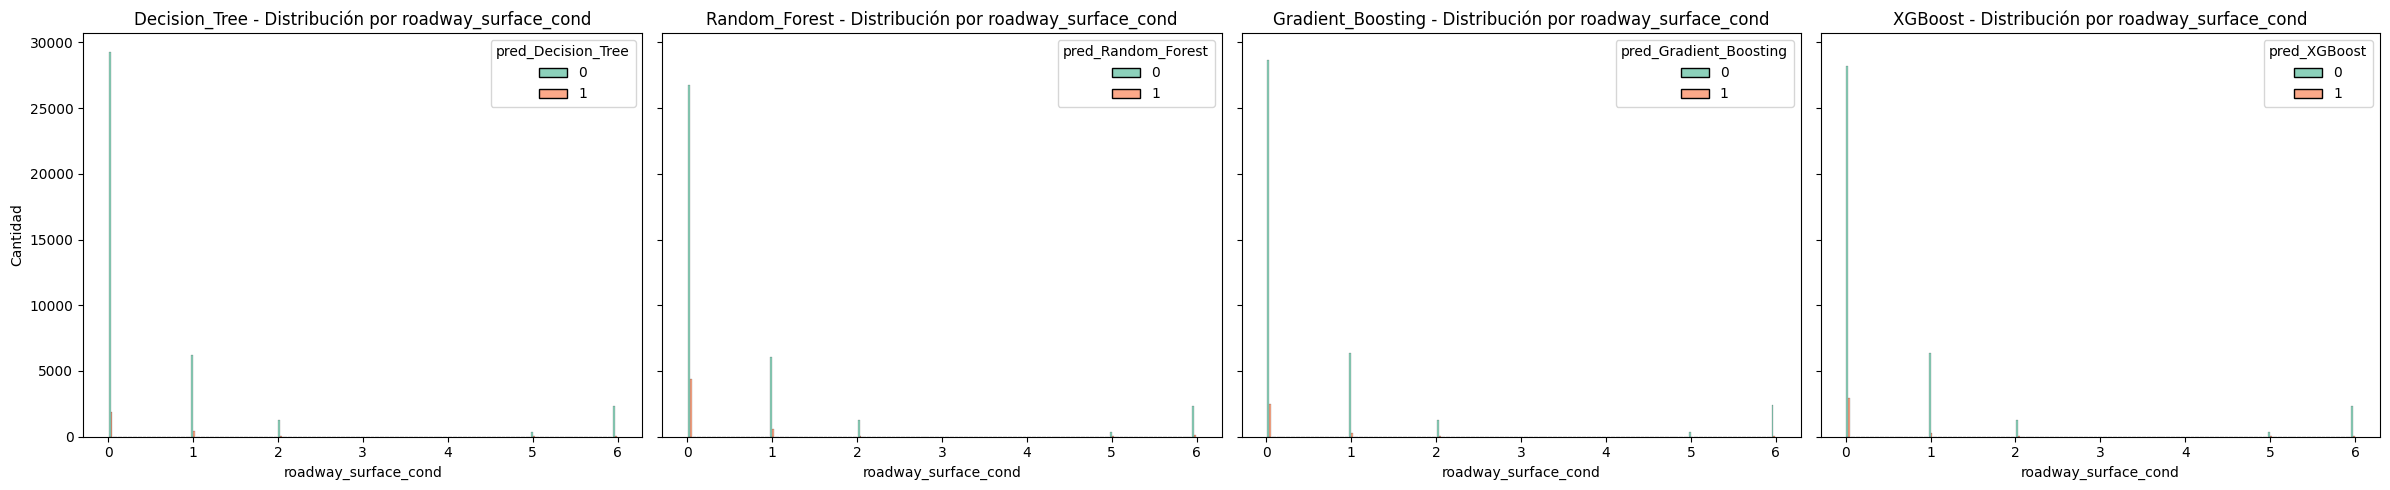

In [53]:
# Función para graficar histogramas en paralelo 
# ==========================
def plot_histograms(df, feature, model_names, bins=None):
    n_models = len(model_names)
    fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 5), sharey=True)

    if n_models == 1:
        axes = [axes]

    for ax, model_name in zip(axes, model_names):
        # Si bins es None, no lo pasamos
        if bins is not None:
            sns.histplot(
                data=df,
                x=feature,
                hue=f"pred_{model_name}",
                multiple="dodge",
                shrink=0.8,
                stat="count",
                bins=bins,
                palette="Set2",
                ax=ax
            )
        else:
            sns.histplot(
                data=df,
                x=feature,
                hue=f"pred_{model_name}",
                multiple="dodge",
                shrink=0.8,
                stat="count",
                palette="Set2",
                ax=ax
            )

        ax.set_title(f"{model_name} - Distribución por {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Cantidad")

    plt.tight_layout()
    plt.show()


# Variables a graficar

variables = {
    "crash_day_of_week": 7,   # 7 días de la semana
    "crash_hour": 24,         # 24 horas
    "roadway_surface_cond": None  # categórica
}

for var, bins in variables.items():
    print(f"\n📊 Histogramas de {var} por modelo")
    plot_histograms(df_test, var, safe_model_names, bins=bins)

## *Validacion cruzada*

---

### *CV(GridSearchCV) para LogisticRegression y RandomForestClassifier*


==== Resultados GridSearchCV ====
Mejor F1-score promedio de CV: 0.6018
Mejor C (regularización inversa): {'C': np.float64(0.0379269019073225)}


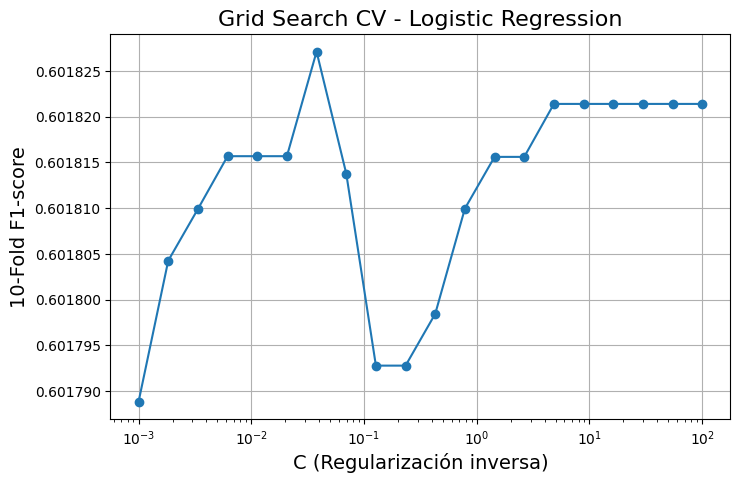

In [54]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Grid Search sobre C (regularización inversa)
# ==========================
C_values = np.logspace(-3, 2, 20)
param_grid = {'C': C_values}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    param_grid=param_grid,
    scoring='f1',      # Para balancear precisión y recall
    cv=10,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)


# Resultados GridSearchCV
# ==========================
print("\n==== Resultados GridSearchCV ====")
print("Mejor F1-score promedio de CV: {:.4f}".format(grid.best_score_))
print("Mejor C (regularización inversa):", grid.best_params_)


# Graficar F1-score vs C
# ==========================
scores = grid.cv_results_['mean_test_score']
plt.figure(figsize=(8,5))
plt.semilogx(C_values, scores, '-o')
plt.xlabel('C (Regularización inversa)', fontsize=14)
plt.ylabel('10-Fold F1-score', fontsize=14)
plt.title('Grid Search CV - Logistic Regression', fontsize=16)
plt.grid(True)
plt.show()

Mejor AP score promedio de CV: 0.6348
Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 200}

Resultados CV ordenados:
   param_n_estimators  param_max_depth  mean_test_score  std_test_score
3                 200               10         0.634754        0.002800
2                 100               10         0.634578        0.003584
1                 200                5         0.629250        0.002575
0                 100                5         0.628446        0.003393
5                 200               20         0.610363        0.004012
4                 100               20         0.610178        0.004211

=== Rendimiento en Test Set ===
              precision    recall  f1-score   support

           0     0.9997    0.6901    0.8166     33854
           1     0.4327    0.9993    0.6039      8008

    accuracy                         0.7492     41862
   macro avg     0.7162    0.8447    0.7102     41862
weighted avg     0.8913    0.7492    0.7759     41862

ROC-AUC:

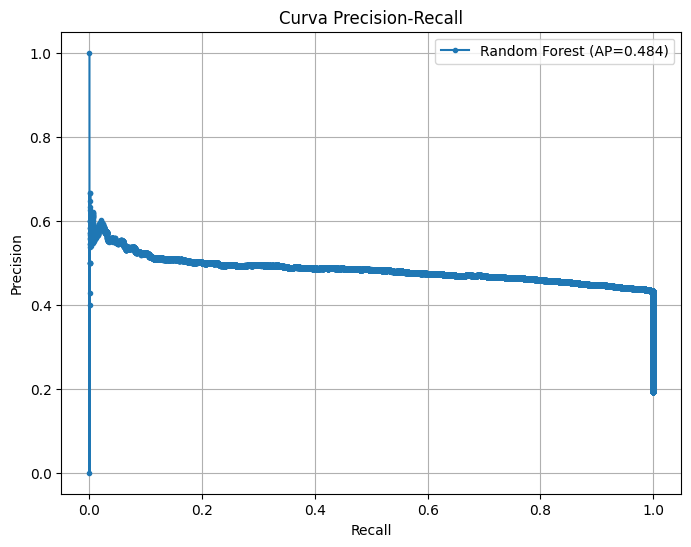

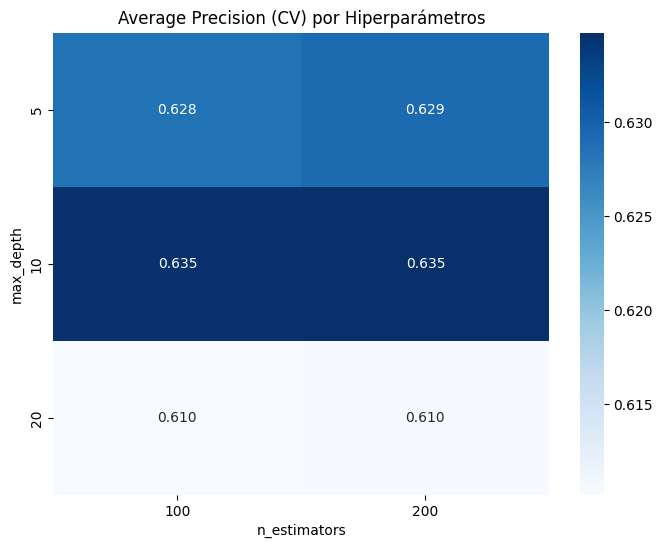

In [ ]:
from sklearn.model_selection import GridSearchCV


# 1. Definir modelo y grid
# ==========================
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid=param_grid,
    scoring="average_precision",  # métrica más robusta para desbalanceo
    cv=5,
    n_jobs=-1,
    return_train_score=True
)


# 2. Entrenar CV
grid.fit(X_train, y_train)


# 3. Resultados CV
print("Mejor AP score promedio de CV: {:.4f}".format(grid.best_score_))
print("Mejores hiperparámetros:", grid.best_params_)

# Convertir resultados a DataFrame
cv_results = pd.DataFrame(grid.cv_results_)

# Visualizar tabla ordenada por score
cv_results_sorted = cv_results[["param_n_estimators","param_max_depth","mean_test_score","std_test_score"]].sort_values(by="mean_test_score", ascending=False)
print("\nResultados CV ordenados:")
print(cv_results_sorted)


# 4. Evaluación en test set
# ==========================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\n=== Rendimiento en Test Set ===")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Average Precision (AP):", average_precision_score(y_test, y_proba))


# 5. Curva Precision-Recall
# ==========================
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, marker=".", label="Random Forest (AP={:.3f})".format(average_precision_score(y_test, y_proba)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()
plt.grid(True)
plt.show()


# 6. Heatmap de resultados
# ==========================
pivot = cv_results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="Blues")
plt.title("Average Precision (CV) por Hiperparámetros")
plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.show()

### *cv(StratifiedKFold) para Balanced RF y Easy Ensemble*

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Preparar cross-validation
# ==========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para guardar resultados
cv_results = {}


#  Definir funciones de scoring
# ==========================
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}


# Loop sobre modelos
# ==========================
for name, model in models.items():
    print(f"\n===== Cross-Validation: {name} =====")
    
    results = {}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer, n_jobs=-1)
        results[metric_name] = (scores.mean(), scores.std())
    
    cv_results[name] = results
    
    # Mostrar resultados
    for metric_name, (mean_score, std_score) in results.items():
        print(f"{metric_name}: {mean_score:.4f} ± {std_score:.4f}")


# Convertir a DataFrame para comparación
# ==========================
summary = []
for model_name, metrics in cv_results.items():
    row = {'Model': model_name}
    for metric_name, (mean_score, std_score) in metrics.items():
        row[f"{metric_name}_mean"] = mean_score
        row[f"{metric_name}_std"] = std_score
    summary.append(row)

df_summary = pd.DataFrame(summary)
df_summary



===== Cross-Validation: Balanced RF =====
accuracy: 0.7725 ± 0.0028
f1: 0.5970 ± 0.0041
roc_auc: 0.8188 ± 0.0034

===== Cross-Validation: Easy Ensemble =====
accuracy: 0.7502 ± 0.0023
f1: 0.6017 ± 0.0022
roc_auc: 0.8460 ± 0.0014


,Model,accuracy_mean,accuracy_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
0,Balanced RF,0.772455,0.002770,0.597047,0.004085,0.818820,0.003376
1,Easy Ensemble,0.750215,0.002338,0.601732,0.002226,0.846034,0.001410


## *Despliegue*
---

In [ ]:
import joblib

# Guardar modelo

joblib.dump(brf, 'best_model.pkl')

# donde estan nuestros archivos?
import os
print("📁 Working directory:", os.getcwd())

📁 Working directory: c:\Users\oridi\Desktop\Programacion\Proyecto ML trafico
